<a href="https://colab.research.google.com/github/ShantanuWagh02/Data-Analytics-/blob/main/Data_Analysis_CaseStudy_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing libraries


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# mount the drive on collab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


If you get unnamed columns when you read the excel file, first define this list of columns as per df . And then pass this in list in usecols parameter while reading the excel file


orders_cols_to_use = [
    'Order ID', 'Customer ID', 'Customer Country', 'Order Datetime',
    'Order Source', 'Sales POC', 'Order Value'
]



customers_cols_to_use = ['Customer ID', 'Customer Country','Age','Gender','Category']



sales_targets_cols_to_use = [
    'Sales POC', 'Sales Manager First Name', 'Sales Manager Last Name','Sales Team', '2023 Sales Target'
]

In [ ]:
orders_df = pd.read_excel("/content/Amazon Orders Dataset (2).xlsx",
                          sheet_name="Orders")
customers_df = pd.read_excel("/content/Amazon Orders Dataset (2).xlsx", sheet_name="Customers")
sales_targets_df = pd.read_excel("/content/Amazon Orders Dataset (2).xlsx", sheet_name="Sales Targets")

In [ ]:
orders_df.head()

,Order ID,Customer ID,Customer Country,Order Datetime,Order Source,Sales POC,Order Value,OrderDate,OrderTime,OrderMonth,OrderDay,Value Category
0,1597,856,USA,2023-12-15 00:50:00,Other,Kwai Yu,412,2023-12-15,00:50:00,12,Friday,Bottom 10%
1,2011,525,India,2023-04-29 23:40:00,Whatsapp,Paul Henriot,4551,2023-04-29,23:40:00,4,Saturday,Middle 80%
2,2822,1614,USA,2023-12-30 00:21:00,Whatsapp,Daniel Da Cunha,3960,2023-12-30,00:21:00,12,Saturday,Middle 80%
3,2889,743,USA,2023-11-28 00:31:00,Whatsapp,Julie Young,8397,2023-11-28,00:31:00,11,Tuesday,Middle 80%
4,3971,20,USA,2023-10-26 23:11:00,Website,Julie Brown,5545,2023-10-26,23:11:00,10,Thursday,Middle 80%


In [ ]:
customers_df.head()

,Customer ID,Customer Country,Gender,Age,Category
0,1,France,M,31.0,A
1,2,Spain,M,49.0,A
2,3,USA,M,39.0,A
3,4,Australia,M,NaN,A
4,5,Denmark,M,81.0,A


In [ ]:
sales_targets_df.head()

,Sales POC,Sales Team,2023 Sales Target,Full Name
0,Kalle Suominen,Epsilon,100000,Amelia Johnson
1,Julie Brown,Alpha,200000,Lukas Schmidt
2,Jeff Young,Beta,200000,Olivia Jensen
3,Kyung Yu,Gamma,100000,Sofia Laine
4,Adrian Huxley,Beta,200000,Chloe Dupont


In [ ]:
print(orders_df.shape)
print(customers_df.shape)
print(sales_targets_df.shape)

(2500, 12)
(2500, 5)
(92, 4)


1. Create OrderDate, OrderTime, OrderMonth, OrderDay columns


In [ ]:
print("Data type of Order Datetime before Conversion: ")
print(orders_df['Order Datetime'].dtypes)

Data type of Order Datetime before Conversion: 
datetime64[ns]


In [ ]:
# if the column is not in datetime format, use this to convert it so
orders_df['Order Datetime'] = pd.to_datetime(orders_df['Order Datetime'])

In [ ]:
orders_df['OrderDate'] = orders_df["Order Datetime"].dt.date
# dt stands for datetime module and .date extracts the date from Order datetime column

orders_df['OrderTime'] = orders_df["Order Datetime"].dt.time

orders_df['OrderMonth'] = orders_df["Order Datetime"].dt.month

orders_df['OrderDay'] = orders_df["Order Datetime"].dt.day_name()

In [ ]:
print("\nDataframe with new date and time columns are: ")

orders_df[['Order Datetime','OrderDate','OrderTime','OrderMonth','OrderDay']].head()


Dataframe with new date and time columns are: 


,Order Datetime,OrderDate,OrderTime,OrderMonth,OrderDay
0,2023-12-15 00:50:00,2023-12-15,00:50:00,12,Friday
1,2023-04-29 23:40:00,2023-04-29,23:40:00,4,Saturday
2,2023-12-30 00:21:00,2023-12-30,00:21:00,12,Saturday
3,2023-11-28 00:31:00,2023-11-28,00:31:00,11,Tuesday
4,2023-10-26 23:11:00,2023-10-26,23:11:00,10,Thursday


2. Conditionally format the orders where order value is in the top and bottom 10%. The top 10% should have a light red fill with dark red text while the bottom 10% should have a yellow fill with dark yellow text


In [ ]:
bottom_10_percentile = orders_df['Order Value'].quantile(0.10)
# 10 percentile

top_10_percentile = orders_df['Order Value'].quantile(0.90)
# 90 percentile

print(f"Bottom 10% Threshold (10th percentile): {bottom_10_percentile}")
print(f"Top 10% Threshold (90th percentile): {top_10_percentile}")

'''
90% of the values are more than 987
and 90% of the values are less than 9030.5
'''

Bottom 10% Threshold (10th percentile): 987.0
Top 10% Threshold (90th percentile): 9030.499999999998


'\n90% of the values are more than 987\nand 90% of the values are less than 9030.5\n'

In [ ]:
# Step 2 : Create a New Column called as  "Value Category"

# define the conditions

conditions = [orders_df["Order Value"] <= bottom_10_percentile , #condition : bottom 10 percentile
              orders_df["Order Value"] >= top_10_percentile] # condition: top 10 percentile

# Define the values to assign for each condition

choices = ['Bottom 10%' , 'Top 10%']

# use np.select to create a new column
# 'default' is what we assign if none of the conditions are met

orders_df['Value Category'] = np.select(conditions,
                                        choices,
                                        default='Middle 80%')


# Verify the result
print("Number of orders in each Category: ")
orders_df['Value Category'].value_counts()

Number of orders in each Category: 


,count
Value Category,
Middle 80%,1999
Bottom 10%,251
Top 10%,250


In [ ]:
print("----10 Examples of Top 10% of Orders-----------")

orders_df[orders_df['Value Category'] == "Top 10%"][["Order Value", "Value Category"]].head(10)

----10 Examples of Top 10% of Orders-----------


,Order Value,Value Category
8,9887,Top 10%
26,9723,Top 10%
29,9179,Top 10%
37,9943,Top 10%
52,9140,Top 10%
53,9163,Top 10%
57,9738,Top 10%
59,9299,Top 10%
62,9844,Top 10%
83,9946,Top 10%


3. Handling missing values in the Customer Country and Order Source columns

a. Find the difference between CountBlank and COUNTA for each of these columns in a new sheet named “Answers”.

b. Replace missing Order Source by the “Other” mode

c. Replace missing Customer Country by an appropriate value

d. In the Customers table, replace missing ages by a moving average of the
previous 3 data points.

In [ ]:
# countblank excele formula counts the number of blank cells or missing values in a column
# COUNTA calculates Non Null Count Values

# 3a : Quantify the number of missing values

# Calculate pandas equivalents of COUNTA and COUNTBLANK for Order Source

# .count() counts the number of records
source_counta = orders_df['Order Source'].count()

# to count the total of null values
source_countblank = orders_df['Order Source'].isnull().sum()


print("Total records in Order Source column : ", source_counta)
print("Total Missing records in Order Source column: ", source_countblank)

Total records in Order Source column :  2500
Total Missing records in Order Source column:  0


In [ ]:
# Calculate the above for 'Customer Country'

country_counta = orders_df['Customer Country'].count()
country_countblank = orders_df['Customer Country'].isnull().sum()

print("Total records in Customer Country column : ", country_counta)
print("Total Missing records in Customer Country column: ", country_countblank)

Total records in Customer Country column :  2500
Total Missing records in Customer Country column:  0


In [ ]:
source_diff = source_counta - source_countblank
# difference between NON NULL  and NULL
country_diff = country_counta - country_countblank

print("Difference between COUNTA and COUNTBLANK for Order Source: ", source_diff)
print("Difference between COUNTA and COUNTBLANK for Customer Country: ", country_diff)

Difference between COUNTA and COUNTBLANK for Order Source:  2500
Difference between COUNTA and COUNTBLANK for Customer Country:  2500


In [ ]:
answers_data = {
    'Metric' : ['COUNTA (Non-Missing)' , 'COUNTBLANK (Missing)' , 'Difference (COUNTA - COUNTBLANK)'],
    'Order Source' : [source_counta, source_countblank, source_diff],
    'Customer Country' : [country_counta, country_countblank, country_diff]
}

answers_df = pd.DataFrame(answers_data).set_index('Metric')

print("Analysis of Missing values :\n ")

answers_df

Analysis of Missing values :
 


,Order Source,Customer Country
Metric,,
COUNTA (Non-Missing),2500,2500
COUNTBLANK (Missing),0,0
Difference (COUNTA - COUNTBLANK),2500,2500


In [ ]:
# filling the missing values (COUNTBLANK) for 'Order Source'

print("Value counts of Order Source BEFORE cleaning ...........")
orders_df['Order Source'].value_counts(dropna = False)

# NaN is missing value representation

Value counts of Order Source BEFORE cleaning ...........


,count
Order Source,
Website,637
Whatsapp,633
App,622
Other,608


In [ ]:
# Impute the missing records in Order Source with "Other"
# It is basically filling or replacing of missing values


# Filling all the missing values with "Other" using .fillna() method
orders_df['Order Source'] = orders_df['Order Source'].fillna('Other')

print("Value counts of Order Source AFTER cleaning ...........")
orders_df['Order Source'].value_counts(dropna = False)

# dropna = False , means dont drop the null or missing values

Value counts of Order Source AFTER cleaning ...........


,count
Order Source,
Website,637
Whatsapp,633
App,622
Other,608


In [ ]:
# We can also impute using mode()
# mode() : frequency
# categorical data: the best way of imputing is to use mode


country_mode = orders_df['Customer Country'].mode()[0]

print(f"The most frequent country (mode) is: {country_mode}")
print("This will be used to fill the missing values")

print("Value counts of Customer Country BEFORE cleaning ...........")
orders_df['Customer Country'].value_counts(dropna = False)

The most frequent country (mode) is: USA
This will be used to fill the missing values
Value counts of Customer Country BEFORE cleaning ...........


,count
Customer Country,
USA,892
France,323
India,281
Spain,268
Australia,198
Italy,112
Singapore,97
Finland,66
Denmark,66


In [ ]:
# using .fillna() fill the msising records with USA

orders_df['Customer Country'].fillna(country_mode ,inplace=True)

print("Value counts of Customer Country AFTER cleaning ...........")
orders_df['Customer Country'].value_counts(dropna = False)

Value counts of Customer Country AFTER cleaning ...........


,count
Customer Country,
USA,892
France,323
India,281
Spain,268
Australia,198
Italy,112
Singapore,97
Finland,66
Denmark,66


5. In the new sheet named “Answers”, find the following (for these analyses remember to
use the cleaned/new columns for Customer Country and Order Source) -

a. Sum of order value and count of orders placed in the 2nd half of the year

b. Sum of order value and count of orders for Indian customers

c. Average order value for orders placed via Whatsapp

d. Find the count of orders whose Order date is on or after 15 June 2023 and which
have been placed by customers who are aged more than 30

In [ ]:
# Sum of order value and count of orders placed in the 2nd half of the year

# Filter out the orders where the month is greater than 7
second_half_orders = orders_df[orders_df['OrderMonth'] >= 7].copy()

# sum of orders placed in 2nd half
sum_2h = second_half_orders['Order Value'].sum()

# count of orders placed in 2nd half
count_2h = len(second_half_orders)

print("Sum of order value in the 2nd half of the year: ", sum_2h)
print("Count of orders placed in the 2nd half of the year: ", count_2h)

Sum of order value in the 2nd half of the year:  6095203
Count of orders placed in the 2nd half of the year:  1249


In [ ]:
# Sum of order value and count of orders for Indian customers

# filtering records which are equal to India
Indian_Orders = orders_df[orders_df['Customer Country'] == 'India'].copy()

# Calculate sum and count basis the condition defined above

sum_india = Indian_Orders['Order Value'].sum()
count_india = len(Indian_Orders)

print("Sum of order value for Indian customers: ", sum_india)
print("Count of orders for Indian customers: ", count_india)

Sum of order value for Indian customers:  1356737
Count of orders for Indian customers:  281


In [ ]:
# Average order value for orders placed via Whatsapp

whatsapp_orders = orders_df[orders_df['Order Source'] == 'Whatsapp'].copy()

# average of whatsapp placed orders
avg_whatsapp = whatsapp_orders['Order Value'].mean()

print("Average order value for orders placed via Whatsapp: ", avg_whatsapp)

Average order value for orders placed via Whatsapp:  4760.823064770932


In [ ]:
# Find the count of orders whose Order date is on or after 15 June 2023 and which
# have been placed by customers who are aged more than 30.

In [ ]:
# merge the dataframes : orders and customers
# An "inner" join or inner merge : Customer ID

merge_df = pd.merge(orders_df, customers_df, on="Customer ID" , how = "inner")

In [ ]:
merge_df.head()

,Order ID,Customer ID,Customer Country_x,Order Datetime,Order Source,Sales POC,Order Value,OrderDate,OrderTime,OrderMonth,OrderDay,Value Category,Customer Country_y,Gender,Age,Category
0,1597,856,USA,2023-12-15 00:50:00,Other,Kwai Yu,412,2023-12-15,00:50:00,12,Friday,Bottom 10%,USA,M,59.0,B
1,2011,525,India,2023-04-29 23:40:00,Whatsapp,Paul Henriot,4551,2023-04-29,23:40:00,4,Saturday,Middle 80%,India,F,20.0,B
2,2822,1614,USA,2023-12-30 00:21:00,Whatsapp,Daniel Da Cunha,3960,2023-12-30,00:21:00,12,Saturday,Middle 80%,USA,M,37.0,D
3,2889,743,USA,2023-11-28 00:31:00,Whatsapp,Julie Young,8397,2023-11-28,00:31:00,11,Tuesday,Middle 80%,USA,F,29.0,B
4,3971,20,USA,2023-10-26 23:11:00,Website,Julie Brown,5545,2023-10-26,23:11:00,10,Thursday,Middle 80%,USA,F,38.0,A


In [ ]:
# define the filtering conditions
# make sure that OrderDate that is datetime format

merge_df['OrderDate'] = pd.to_datetime(merge_df['OrderDate'])

# date condition
date_condition = merge_df['OrderDate'] >= pd.to_datetime('2023-06-15') # yyyy-mm-dd

# age condition
age_condition = merge_df['Age'] > 30

# apply both the conditions to get the final count
filter_count = len(merge_df[date_condition & age_condition])

print("\n ---Results --------")
print(f"Count of orders on/after 15th June 2023 and customers greater than age 30 are :  {filter_count}")


 ---Results --------
Count of orders on/after 15th June 2023 and customers greater than age 30 are :  1082


6. In the Sales Targets sheet, get rid of the first name and last name columns to get a single Full Name column.
Add this new column at the end in this sheet.


In [ ]:
sales_targets_df.head()

,Sales POC,Sales Team,2023 Sales Target,Full Name
0,Kalle Suominen,Epsilon,100000,Amelia Johnson
1,Julie Brown,Alpha,200000,Lukas Schmidt
2,Jeff Young,Beta,200000,Olivia Jensen
3,Kyung Yu,Gamma,100000,Sofia Laine
4,Adrian Huxley,Beta,200000,Chloe Dupont


In [ ]:
# Create a "Full Name" column by concatenating the first name and last name

# sales_targets_df_copy = sales_targets_df.copy()
# rest of the operations will remain the same while applying on _copy

sales_targets_df['Full Name'] = (sales_targets_df['Sales Manager First Name'] + " "
                                 + sales_targets_df['Sales Manager Last Name'])

# get rid of first name and last name columns : .drop()

sales_targets_df.drop(columns = ['Sales Manager First Name','Sales Manager Last Name'],
                      inplace = True,
                      axis = 1)

# Verification

print("\n--------Sales Target Dataframe-------------------")
sales_targets_df.head()

KeyError: 'Sales Manager First Name'

4. Data Cleaning

a. Find outliers, if any, in the data (using both the quartile approach and Box plot
approach)'

i. Order Value in Orders table
ii. Age column in Customers table

Q1 value is :  2364.0
Q3 value is :  7439.25
IQR value.......:  5075.25
Lower Bound value:  -5248.875
Upper Bound value:  15052.125

Generating Box Plot for Order Value ...................


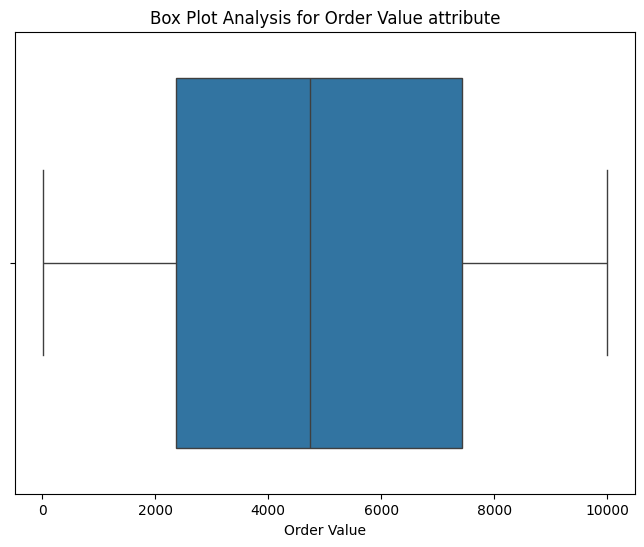

In [ ]:
# Quartile approach

# We are performing for Order Value column
Q1_value = orders_df['Order Value'].quantile(0.25)
print("Q1 value is : ", Q1_value)

Q3_value = orders_df['Order Value'].quantile(0.75)
print("Q3 value is : ", Q3_value)

IQR_value = Q3_value - Q1_value
print("IQR value.......: ", IQR_value)

# Define the outlier boundaries
lower_bound_value = Q1_value - 1.5 * IQR_value
print("Lower Bound value: ", lower_bound_value)
upper_bound_value = Q3_value + 1.5 * IQR_value
print("Upper Bound value: ", upper_bound_value)


# Main condition : Identify the outliers
# if the values are lesser than the lower bound value
# or if they are greater than the upper bound value
# then classify them as outliers
value_outliers = orders_df[(orders_df['Order Value'] < lower_bound_value) | (orders_df['Order Value'] > upper_bound_value)]


# Box plot approach
print("\nGenerating Box Plot for Order Value ...................")

plt.figure(figsize = (8,6))
sns.boxplot(x = orders_df['Order Value']) # define for which column you want Box plot to be plotted
plt.title("Box Plot Analysis for Order Value attribute")
plt.xlabel('Order Value')
#plt.grid(True)
plt.show()


 ----------Monthly aggregated data----------------------
    OrderMonth  NumberOfOrders  AverageOrderValue
0            1             217        4854.428571
1            2             220        4979.590909
2            3             197        5166.223350
3            4             197        4822.233503
4            5             207        4901.642512
5            6             213        4926.760563
6            7             209        4989.196172
7            8             207        5169.579710
8            9             195        4759.041026
9           10             201        4673.492537
10          11             229        5236.109170
11          12             208        4403.384615


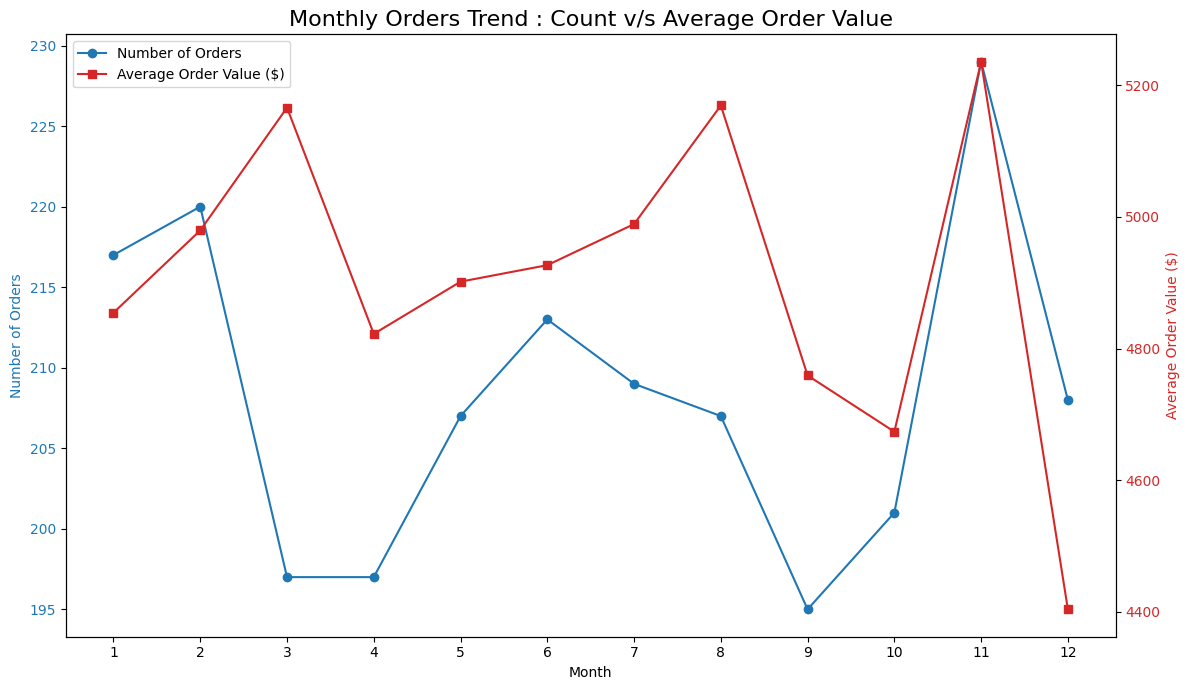

In [ ]:
# we will order OrderMonth column (question 1)
# groupby()
# aggregate function : .agg()
# number of order : count()
# AO value : mean()

# dual axis chart : when you have different scales

# Create monthly orders trend


# Group the orders_df by 'OrderMonth' and aggregate
# We calculate the count of orders and the mean of order value for each month

monthly_trends = orders_df.groupby('OrderMonth').agg(
    NumberOfOrders = ('Order Value', 'count'),
    AverageOrderValue = ('Order Value', 'mean')
).reset_index()

print("\n ----------Monthly aggregated data----------------------")
print(monthly_trends)
# .reset_index() will OrderMonth column and turn it back into column

# Visualize the trendusing dual-axis chart
# create the figure and first Y-axis

fig,ax1 = plt.subplots(figsize = (12,7))


# Plot the number of orders on first Y-axis (ax1)
color = "tab:blue"
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of Orders', color = color)
ax1.plot(monthly_trends['OrderMonth'],
         monthly_trends['NumberOfOrders'],
         color = color,
         marker='o',
         label = 'Number of Orders')
ax1.tick_params(axis = 'y', labelcolor = color)
# ax1.grid(True,linestyle = '--' , alpha=0.6)

# Plot the second Y-axis(ax2) and shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Average Order Value ($)', color = color)
ax2.plot(monthly_trends['OrderMonth'],
         monthly_trends['AverageOrderValue'],
         color = color,
         marker='s',
         linestyle = 'solid',
        label = 'Average Order Value ($)')
ax2.tick_params(axis = 'y', labelcolor = color)


# Final chart formatting
plt.title('Monthly Orders Trend : Count v/s Average Order Value' , fontsize = 16)
fig.tight_layout()
plt.xticks(ticks = monthly_trends['OrderMonth'])
# Ensures all the month numbers are shown on x-axis

# adding a unified legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc = 'upper left')

plt.show()